In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
for table_name in Base.classes.keys():
    print(table_name)


measurement
station


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Find the most recent date in the data set
most_recent_date = Session.query(func.max(Measurement.date)).scalar()

print(f"Most recent date in the data set is: {most_recent_date}")

Most recent date in the data set is: 2017-08-23


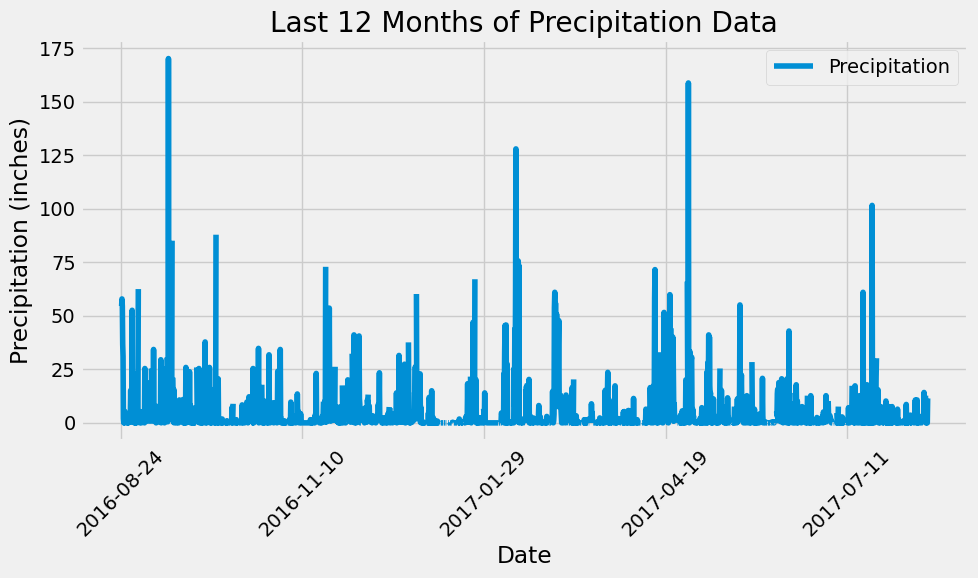

In [11]:

# Calculate the date one year from the last date in the dataset
last_date = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
one_year_ago = dt.datetime.strptime(last_date[0], '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
Precipitation = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
Precipitation = Precipitation.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
Precipitation.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'D:\Ohana - Data Analysis Bootcamp\Classwork\WAUS-VIRT-DATA-PT-03-2023-U-LOLC\02-Homework\10-Advanced-SQL\SurfsUp\Images/image01.png')
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = Session.query(func.count(Station.station)).scalar()
print(station_count)

9


In [14]:
# Design a query to find the most active stations
active_stations = Session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts in descending order
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [15]:
# Get the most active station ID
most_active_station = active_stations[0][0]

# Design a query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station).all()

# Extract the temperature statistics
lowest_temp = temperature_stats[0][0]
highest_temp = temperature_stats[0][1]
average_temp = temperature_stats[0][2]

# Print the temperature statistics
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")


Lowest Temperature: 12.2
Highest Temperature: 29.4
Average Temperature: 22.03582251082252


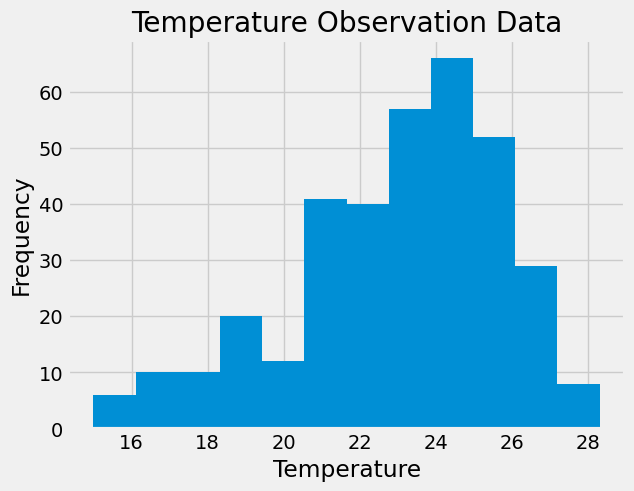

In [17]:
# Find the most active station
most_active_station = Session.query(Measurement.station).\
                        group_by(Measurement.station).\
                        order_by(func.count().desc()).\
                        first()[0]

# Calculate the date one year ago from the most recent date
most_recent_date = Session.query(func.max(Measurement.date)).scalar()
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = Session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station).\
                    filter(Measurement.date >= one_year_ago).all()

# Extract the temperature values
temperatures = [result[0] for result in temperature_data]

# Create the histogram
plt.hist(temperatures, bins=12)

# Set the labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data')

# Display the plot
plt.savefig(r'D:\Ohana - Data Analysis Bootcamp\Classwork\WAUS-VIRT-DATA-PT-03-2023-U-LOLC\02-Homework\10-Advanced-SQL\SurfsUp\Images/image02.png')
plt.show()


# Close Session

In [ ]:
# Close Session
Session.close()